In [347]:
%matplotlib notebook

In [348]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import scipy.stats as st
from scipy.stats import linregress

In [349]:
crimes_df = "Graph Check.csv"

crimes_df = pd.read_csv(crimes_df, encoding="utf=8")

crimes_df

,Date,Primary Type,Year
0,Sep-17,THEFT,2017
1,Jul-17,THEFT,2017
2,Feb-17,CRIMINAL DAMAGE,2017
3,Jul-17,THEFT,2017
4,Jul-17,THEFT,2017
...,...,...,...
638246,Oct-21,THEFT,2021
638247,Aug-21,THEFT,2021
638248,Dec-21,THEFT,2021
638249,Jul-21,THEFT,2021


In [350]:
crimes_df = crimes_df.dropna(how='any')

In [351]:
crimes_df.count()

Date            638251
Primary Type    638251
Year            638251
dtype: int64

In [352]:
crimes_df

,Date,Primary Type,Year
0,Sep-17,THEFT,2017
1,Jul-17,THEFT,2017
2,Feb-17,CRIMINAL DAMAGE,2017
3,Jul-17,THEFT,2017
4,Jul-17,THEFT,2017
...,...,...,...
638246,Oct-21,THEFT,2021
638247,Aug-21,THEFT,2021
638248,Dec-21,THEFT,2021
638249,Jul-21,THEFT,2021


In [353]:
crimes_2019 = crimes_df[crimes_df["Year"] == 2019]
crimes_2019

,Date,Primary Type,Year
285594,Oct-19,THEFT,2019
285595,Oct-19,THEFT,2019
285596,Oct-19,CRIMINAL DAMAGE,2019
285597,Oct-19,THEFT,2019
285598,Oct-19,BATTERY,2019
...,...,...,...
424260,May-19,BATTERY,2019
424261,Apr-19,THEFT,2019
424262,May-19,BATTERY,2019
424263,May-19,BATTERY,2019


In [354]:
jan_19 = crimes_2019[crimes_2019["Date"] == "Jan-19"]
jan_19

,Date,Primary Type,Year
285930,Jan-19,THEFT,2019
285954,Jan-19,BATTERY,2019
285977,Jan-19,THEFT,2019
286012,Jan-19,THEFT,2019
287441,Jan-19,THEFT,2019
...,...,...,...
424175,Jan-19,BATTERY,2019
424176,Jan-19,BATTERY,2019
424177,Jan-19,BATTERY,2019
424178,Jan-19,THEFT,2019


In [355]:
jan_19 = pd.value_counts(jan_19["Primary Type"])
jan_19

THEFT              4557
BATTERY            3524
CRIMINAL DAMAGE    1794
Name: Primary Type, dtype: int64

In [356]:
feb_19 = crimes_2019[crimes_2019["Date"] == "Feb-19"]
feb_19

,Date,Primary Type,Year
285619,Feb-19,THEFT,2019
285760,Feb-19,CRIMINAL DAMAGE,2019
285769,Feb-19,BATTERY,2019
285922,Feb-19,THEFT,2019
285923,Feb-19,THEFT,2019
...,...,...,...
424186,Feb-19,THEFT,2019
424187,Feb-19,THEFT,2019
424188,Feb-19,THEFT,2019
424189,Feb-19,THEFT,2019


In [357]:
feb_19 = pd.value_counts(feb_19["Primary Type"])
feb_19

THEFT              4392
BATTERY            3344
CRIMINAL DAMAGE    1717
Name: Primary Type, dtype: int64

In [358]:
mar_19 = crimes_2019[crimes_2019["Date"] == "Mar-19"]
mar_19

,Date,Primary Type,Year
285601,Mar-19,THEFT,2019
285604,Mar-19,THEFT,2019
285605,Mar-19,THEFT,2019
285608,Mar-19,THEFT,2019
285677,Mar-19,THEFT,2019
...,...,...,...
424199,Mar-19,THEFT,2019
424200,Mar-19,BATTERY,2019
424201,Mar-19,BATTERY,2019
424215,Mar-19,BATTERY,2019


In [359]:
mar_19 = pd.value_counts(mar_19["Primary Type"])
mar_19

THEFT              4478
BATTERY            4060
CRIMINAL DAMAGE    2026
Name: Primary Type, dtype: int64

In [360]:
apr_19 = crimes_2019[crimes_2019["Date"] == "Apr-19"]
apr_19

,Date,Primary Type,Year
285617,Apr-19,THEFT,2019
285622,Apr-19,THEFT,2019
285634,Apr-19,THEFT,2019
285642,Apr-19,THEFT,2019
285663,Apr-19,THEFT,2019
...,...,...,...
424235,Apr-19,THEFT,2019
424237,Apr-19,THEFT,2019
424242,Apr-19,THEFT,2019
424245,Apr-19,BATTERY,2019


In [361]:
apr_19 = pd.value_counts(apr_19["Primary Type"])
apr_19

THEFT              4653
BATTERY            3977
CRIMINAL DAMAGE    2277
Name: Primary Type, dtype: int64

In [362]:
may_19 = crimes_2019[crimes_2019["Date"] == "May-19"]
may_19

,Date,Primary Type,Year
285713,May-19,THEFT,2019
285764,May-19,BATTERY,2019
285765,May-19,BATTERY,2019
285766,May-19,THEFT,2019
285799,May-19,THEFT,2019
...,...,...,...
424258,May-19,CRIMINAL DAMAGE,2019
424259,May-19,THEFT,2019
424260,May-19,BATTERY,2019
424262,May-19,BATTERY,2019


In [363]:
may_19 = pd.value_counts(may_19["Primary Type"])
may_19

THEFT              5397
BATTERY            4759
CRIMINAL DAMAGE    2498
Name: Primary Type, dtype: int64

In [364]:
jun_19 = crimes_2019[crimes_2019["Date"] == "Jun-19"]
jun_19

,Date,Primary Type,Year
285966,Jun-19,BATTERY,2019
285991,Jun-19,THEFT,2019
285992,Jun-19,THEFT,2019
286633,Jun-19,THEFT,2019
286634,Jun-19,THEFT,2019
...,...,...,...
422889,Jun-19,BATTERY,2019
422905,Jun-19,THEFT,2019
422929,Jun-19,BATTERY,2019
422938,Jun-19,BATTERY,2019


In [365]:
jun_19 = pd.value_counts(jun_19["Primary Type"])
jun_19

THEFT              5655
BATTERY            4749
CRIMINAL DAMAGE    2531
Name: Primary Type, dtype: int64

In [366]:
jul_19 = crimes_2019[crimes_2019["Date"] == "Jul-19"]
jul_19

,Date,Primary Type,Year
286636,Jul-19,BATTERY,2019
286890,Jul-19,BATTERY,2019
287206,Jul-19,BATTERY,2019
287217,Jul-19,BATTERY,2019
287947,Jul-19,BATTERY,2019
...,...,...,...
422874,Jul-19,BATTERY,2019
422886,Jul-19,BATTERY,2019
422919,Jul-19,THEFT,2019
422930,Jul-19,BATTERY,2019


In [367]:
jul_19 = pd.value_counts(jul_19["Primary Type"])
jul_19

THEFT              5998
BATTERY            4872
CRIMINAL DAMAGE    2597
Name: Primary Type, dtype: int64

In [368]:
aug_19 = crimes_2019[crimes_2019["Date"] == "Aug-19"]
aug_19

,Date,Primary Type,Year
285679,Aug-19,THEFT,2019
285949,Aug-19,BATTERY,2019
286069,Aug-19,CRIMINAL DAMAGE,2019
286298,Aug-19,THEFT,2019
286641,Aug-19,BATTERY,2019
...,...,...,...
422910,Aug-19,BATTERY,2019
422917,Aug-19,BATTERY,2019
422924,Aug-19,THEFT,2019
422928,Aug-19,BATTERY,2019


In [369]:
aug_19 = pd.value_counts(aug_19["Primary Type"])
aug_19

THEFT              6173
BATTERY            4556
CRIMINAL DAMAGE    2567
Name: Primary Type, dtype: int64

In [370]:
sep_19 = crimes_2019[crimes_2019["Date"] == "Sep-19"]
sep_19

,Date,Primary Type,Year
285656,Sep-19,THEFT,2019
285792,Sep-19,THEFT,2019
285857,Sep-19,THEFT,2019
285863,Sep-19,THEFT,2019
285950,Sep-19,BATTERY,2019
...,...,...,...
422877,Sep-19,BATTERY,2019
422890,Sep-19,THEFT,2019
422904,Sep-19,BATTERY,2019
422914,Sep-19,BATTERY,2019


In [371]:
sep_19 = pd.value_counts(sep_19["Primary Type"])
sep_19

THEFT              5443
BATTERY            4321
CRIMINAL DAMAGE    2370
Name: Primary Type, dtype: int64

In [372]:
oct_19 = crimes_2019[crimes_2019["Date"] == "Oct-19"]
oct_19

,Date,Primary Type,Year
285594,Oct-19,THEFT,2019
285595,Oct-19,THEFT,2019
285596,Oct-19,CRIMINAL DAMAGE,2019
285597,Oct-19,THEFT,2019
285598,Oct-19,BATTERY,2019
...,...,...,...
422880,Oct-19,BATTERY,2019
422883,Oct-19,BATTERY,2019
422903,Oct-19,BATTERY,2019
422913,Oct-19,THEFT,2019


In [373]:
oct_19 = pd.value_counts(oct_19["Primary Type"])
oct_19

THEFT              5389
BATTERY            3863
CRIMINAL DAMAGE    2328
Name: Primary Type, dtype: int64

In [374]:
nov_19 = crimes_2019[crimes_2019["Date"] == "Nov-19"]
nov_19

,Date,Primary Type,Year
287508,Nov-19,BATTERY,2019
288950,Nov-19,THEFT,2019
301074,Nov-19,CRIMINAL DAMAGE,2019
337929,Nov-19,BATTERY,2019
338614,Nov-19,BATTERY,2019
...,...,...,...
422927,Nov-19,THEFT,2019
422940,Nov-19,THEFT,2019
422941,Nov-19,THEFT,2019
422946,Nov-19,THEFT,2019


In [375]:
nov_19 = pd.value_counts(nov_19["Primary Type"])
nov_19

THEFT              4887
BATTERY            3668
CRIMINAL DAMAGE    1989
Name: Primary Type, dtype: int64

In [376]:
dec_19 = crimes_2019[crimes_2019["Date"] == "Dec-19"]
dec_19

,Date,Primary Type,Year
285967,Dec-19,BATTERY,2019
286640,Dec-19,THEFT,2019
287593,Dec-19,BATTERY,2019
288971,Dec-19,BATTERY,2019
296442,Dec-19,BATTERY,2019
...,...,...,...
422911,Dec-19,BATTERY,2019
422912,Dec-19,BATTERY,2019
422922,Dec-19,THEFT,2019
422932,Dec-19,BATTERY,2019


In [377]:
dec_19 = pd.value_counts(dec_19["Primary Type"])
dec_19

THEFT              5458
BATTERY            3817
CRIMINAL DAMAGE    1987
Name: Primary Type, dtype: int64

In [378]:
crime_temp = pd.DataFrame({
    "Year": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
    "Temperature": [21, 25.9, 34.2, 49.7, 58, 67.8, 77.1, 72.9, 69.4, 50.9, 34.8, 34],
    "Theft": [4557, 4392, 4478, 4652, 5397, 5655, 5995, 6173, 5443, 5389 ,4887, 5458],
    "Battery Crimes": [3224, 3344, 4060, 3977, 4759, 4749, 4872, 4556, 4321, 3863,3668 ,3817],
    "Criminal Damage": [1794, 1717, 2026, 2277, 2498, 2531, 2591, 2567, 2370, 2328, 1989, 1987]
})

crime_temp

,Year,Temperature,Theft,Battery Crimes,Criminal Damage
0,2019,21.0,4557,3224,1794
1,2019,25.9,4392,3344,1717
2,2019,34.2,4478,4060,2026
3,2019,49.7,4652,3977,2277
4,2019,58.0,5397,4759,2498
5,2019,67.8,5655,4749,2531
6,2019,77.1,5995,4872,2591
7,2019,72.9,6173,4556,2567
8,2019,69.4,5443,4321,2370
9,2019,50.9,5389,3863,2328


In [379]:
crime_temp = crime_temp.set_index(["Year"])
crime_temp

,Temperature,Theft,Battery Crimes,Criminal Damage
Year,,,,
2019,21.0,4557,3224,1794
2019,25.9,4392,3344,1717
2019,34.2,4478,4060,2026
2019,49.7,4652,3977,2277
2019,58.0,5397,4759,2498
2019,67.8,5655,4749,2531
2019,77.1,5995,4872,2591
2019,72.9,6173,4556,2567
2019,69.4,5443,4321,2370


In [380]:
crime_temp.dtypes

Temperature        float64
Theft                int64
Battery Crimes       int64
Criminal Damage      int64
dtype: object

In [381]:
crime_temp = crime_temp.astype({"Temperature": int}, errors='raise')

In [382]:
crime_temp.dtypes

Temperature        int32
Theft              int64
Battery Crimes     int64
Criminal Damage    int64
dtype: object

<IPython.core.display.Javascript object>


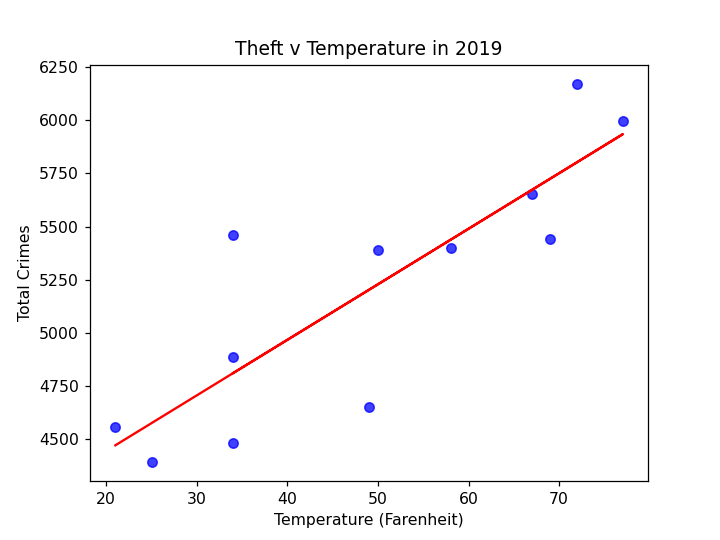

The r-squared is: 0.7161571732366232


In [400]:
temp = crime_temp["Temperature"]
theft = [4557, 4392, 4478, 4652, 5397, 5655, 5995, 6173, 5443, 5389 ,4887, 5458]
battery_crimes = [3224, 3344, 4060, 3977, 4759, 4749, 4872, 4556, 4321, 3863,3668 ,3817]
criminal_damage = [1794, 1717, 2026, 2277, 2498, 2531, 2591, 2567, 2370, 2328, 1989, 1987]

plt.scatter(temp, theft, marker="o", facecolors="b", alpha=.75)
#plt.scatter(temp, battery_crimes, marker="o", facecolors="r", alpha=.75)
#plt.scatter(temp, criminal_damage, marker="o", facecolors="g", alpha=.75)

plt.title("Theft v Temperature in 2019")
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Total Crimes")


(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, theft)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(temp,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")
plt.show()



plt.savefig("Theft v Temperature in 2019.png")

In [411]:
correlation = st.pearsonr(temp,theft)

correlation

(0.8462607005152865, 0.0005194246380113392)

In [409]:
correlation = st.pearsonr(temp,battery_crimes)

correlation

(0.9096928455312594, 4.058333193874259e-05)

In [410]:
correlation = st.pearsonr(temp,criminal_damage)

correlation

(0.9610351132728641, 6.625257939743298e-07)